# MAT-view: Visualization Tools for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-view as a **web application**.

The present package offers a tool, to support the user in the task of visualizing multiple aspect trajectories and movelets. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Apr, 2024
Copyright (C) 2024, License GPL Version 3 or superior (see LICENSE file)

In [1]:
!pip install mat-view

ERROR: Could not find a version that satisfies the requirement mat-view (from versions: none)
ERROR: No matching distribution found for mat-view


### 1. Running the Web-app


In [1]:
from matview.scripting.component._base import BaseMethod

BaseMethod.providedMethods()

{'H': matview.scripting.component.hiper.HiperMovelets,
 'U': matview.scripting.component.ultra.UltraMovelets,
 'R': matview.scripting.component.ultra.RandomMovelets,
 'MARC': matview.scripting.component.marc.MARC,
 'poi': matview.scripting.component.pois.POI,
 'npoi': matview.scripting.component.pois.NPOI,
 'wnpoi': matview.scripting.component.pois.WNPOI,
 'TRF': matview.scripting.component.mat.TRF,
 'TXGB': matview.scripting.component.mat.TXGB,
 'DeepeST': matview.scripting.component.mat.DeepeST,
 'Tulvae': matview.scripting.component.mat.Tulvae,
 'Bituler': matview.scripting.component.mat.Bituler,
 'MM': matview.scripting.component.master.MasterMovelets,
 'SM': matview.scripting.component.super.SuperMovelets,
 'Dodge': matview.scripting.component.raw.Dodge,
 'Xiao': matview.scripting.component.raw.Xiao,
 'Zheng': matview.scripting.component.raw.Zheng,
 'M': matview.scripting.component.raw.Movelets}

In [5]:
import os
import glob2 as glob
def getResultFiles(res_path, patterns = []):
    def findFiles(x):
        search = os.path.join(res_path, '**', x)
        return list(glob.glob(search, recursive=True))
       
    filesList = sum(list(map(lambda p: findFiles(p), patterns)), [])

    filesList = list(set(filesList))
    
#    filesList = list(filter(lambda file: 'POI' not in os.path.basename(file).split('-')[0], filesList))
    
    filesList.sort()
    
    return filesList

In [73]:
respath = '/Users/tarlisportela/Downloads/sample/results'

patterns = ['model_*_summary.csv', '*.txt']

#files = getResultFiles(respath, patterns)

In [58]:
Path('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/HL/model/test.csv').match('model_*_summary.csv')

False

In [30]:
def find_files(directory, pattern='*'):
    if not os.path.exists(directory):
        raise ValueError("Directory not found {}".format(directory))

    matches = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            full_path = os.path.join(root, filename)
            if fnmatch.filter([full_path], pattern):
                matches.append(os.path.join(root, filename))
    return matches

In [110]:
def listpath(path, patterns):
    def match(f, patterns):
        return any(map(lambda x: Path(f).match(x), patterns))
    
    files = {}
    for f in os.scandir(path):
        f2 = os.path.join(path, f)
        if os.path.isdir(f):
            d = os.path.basename(f2)
            subfiles = listpath(f2, patterns)
            if len(subfiles) > 0:
                files.update({d: subfiles})
        else:
            if match(f2, patterns):
                files.update({Path(f2): None})
    return files

In [111]:
ls = listpath(respath, patterns)
ls

{'FoursquareNYC': {'MML': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MML/MML.txt'): None},
  'MMp': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MMp/MMp.txt'): None},
  'MARC_150_add_gru': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MARC_150_add_gru/MARC_150_add_gru.txt'): None},
  'Xiao': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/Xiao/Xiao.txt'): None},
  'MMpL': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MMpL/MMpL.txt'): None},
  'SM': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/SM/SM.txt'): None},
  'DeepeST': {'DeepeST': {PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/DeepeST/DeepeST/model_deepest_summary.csv'): None},
   PosixPath('/Users/tarlisportela/Downloads/sample/results/FoursquareNYC/DeepeST/DeepeST.txt'): None},
  'HL': {PosixPath('/Users/tarlisportela/Downloads/sample/results/Four

In [115]:
#ls[0].keys(), ls[0]['FoursquareNYC'][0].keys()
for dataset in ls.keys():
    print(dataset)
    for one in ls[dataset].keys():
        print(' - ', one)
        for two in ls[dataset][one].keys():
            print(' - ', ' - ', two)

FoursquareNYC
 -  MML
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MML/MML.txt
 -  MMp
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MMp/MMp.txt
 -  MARC_150_add_gru
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MARC_150_add_gru/MARC_150_add_gru.txt
 -  Xiao
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/Xiao/Xiao.txt
 -  MMpL
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/MMpL/MMpL.txt
 -  SM
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/SM/SM.txt
 -  DeepeST
 -   -  DeepeST
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/DeepeST/DeepeST.txt
 -  HL
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/HL/HL.txt
 -   -  model
 -  Hp
 -   -  model
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/Hp/Hp.txt
 -  WNPOI_space_1_2_3_4
 -   -  /Users/tarlisportela/Downloads/sample/results/FoursquareNYC/WNPOI_spac

In [26]:
from pathlib import Path
def decodeURL(ijk):
    path = Path(ijk)
    parts = list(path.parts[-4:])
    parts[-1] = path.stem
    
    return parts
    if parts[-1] != parts[-2]:
        return None
    else:
        return parts
    rpos = ijk.find('run')
    path = ijk[:ijk.find(os.path.sep, rpos+5)]

    if ijk.endswith('classification_times.csv'):
        statsf = ijk
        files = glob.glob(os.path.join(path, '*-*.txt'))
        ijk = files[0] if len(files) > 0 else None
    else:
        files = glob.glob(os.path.join(path, '*', 'classification_times.csv'))
        if len(files) > 0:
            statsf = files[0]
        else:
            statsf = None

    if statsf:
        model = os.path.dirname(statsf)
        model = model[model.rfind(os.path.sep)+1:]
    else:
        model = 'model'

    method = path[path.rfind(os.path.sep)+1:]
    subset = method.split('-')[-1]
    method = method.split('-')[0]

    run = path[rpos:rpos+4]
    run = (run)[3:]

    prefix = os.path.basename(path[:rpos-1])

    subsubset = subset

    random = '1' if '-' not in model else model.split('-')[-1]

    return run, random, method, subset, subsubset, prefix, model, path, ijk, statsf
    
decodeURL(files[1])

['results', 'FoursquareNYC', 'HL', 'HL']

xxx

### 2. Using separated functions


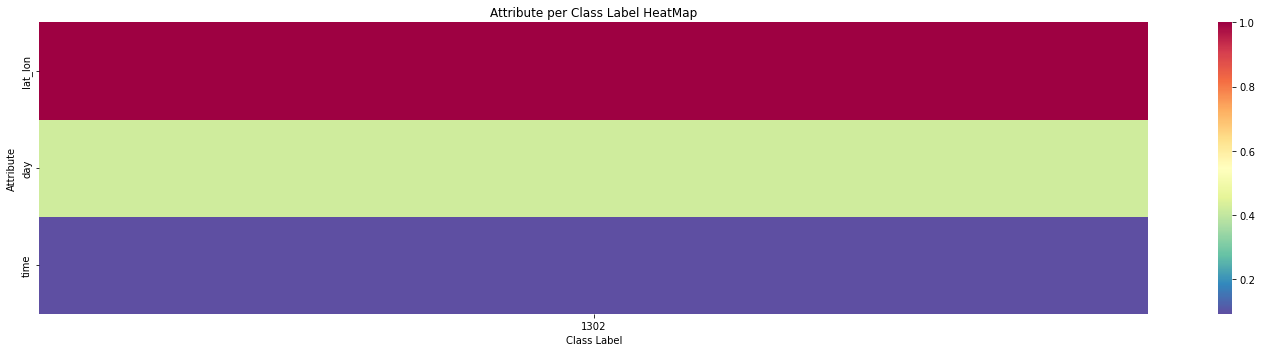

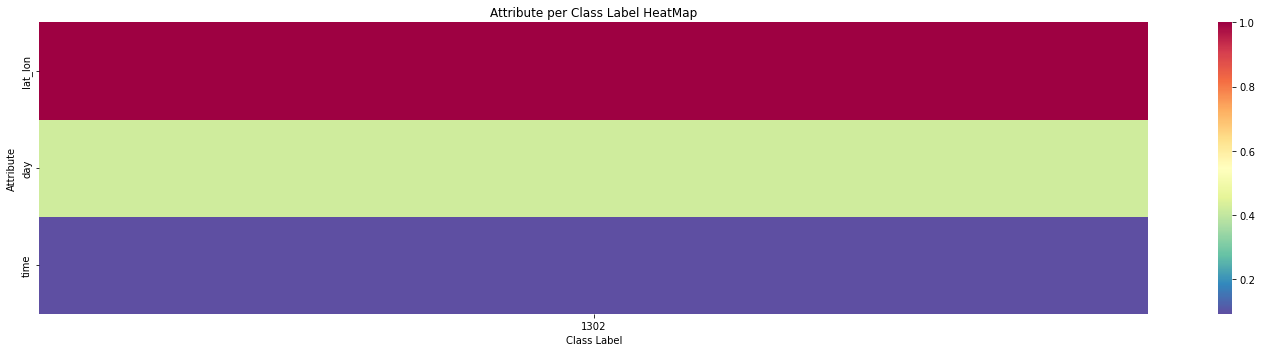

<function matview.plot.critical_difference.render(df, column=None, methods_order=None)>

\# By Tarlis Portela (2023)